# Data exploration

In [1]:
#load datafram from pickle
import pandas as pd
df = pd.read_pickle("adultRecoded.pkl")

In [2]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,workclassR,workclassR2,marital-statusR,countryR
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Self-emp,Self-emp,Married,north.america
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Private,Private,Not-Married,north.america
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Private,Private,Married,north.america
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Private,Private,Married,north.america
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,Private,Private,Married,north.america
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,Private,Private,Married,north.america
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,Self-emp,Self-emp,Married,north.america
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,Private,Private,Never-married,north.america
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,Private,Private,Married,north.america
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,Private,Private,Married,north.america


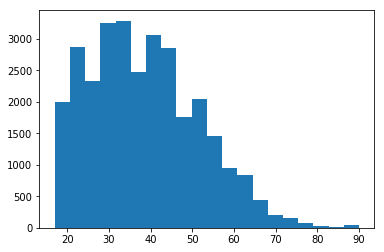

In [3]:
#simple histogram showing age distribution
import matplotlib.pyplot as plt

x = df.loc[:,'age']

plt.hist(x, bins=20)
#plt.ylabel('No of times')
plt.show()

First attempt to plot age counts for the two conditions does not look right, the bars should be overlaying

C:\Users\karol\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


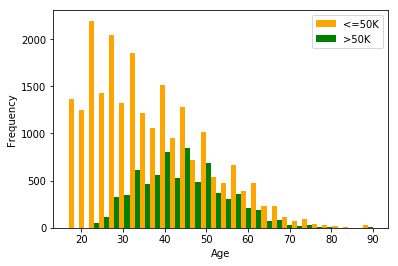

In [4]:
#plt.hist([score_india, score_pk], color=['orange', 'green'])
salary_over_50K = df['salary'] == ">50K"
salary_under_50K = df['salary'] == "<=50K"

age_salary_under_50 = df.loc[salary_under_50K, 'age']
age_salary_over_50 = df.loc[salary_over_50K, 'age']

plt.hist([age_salary_under_50, age_salary_over_50], color=['orange', 'green'], bins = 30, rwidth=1)
legend = ['<=50K', '>50K']

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(legend)
plt.show()

That's not quite right because the indexes are not continuous, how do I create an overlaid histogram

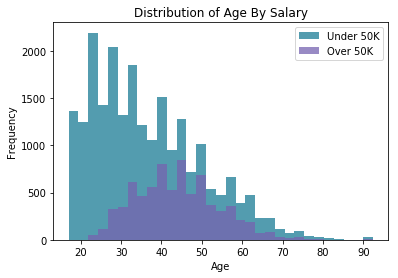

In [5]:
import numpy as np
#a function for overlaid histogram from the link at the end

def overlaid_histogram(data1, data1_name, data1_color, data2, data2_name, data2_color, x_label, y_label, title):
    # Set the bounds for the bins so that the two distributions are
    # fairly compared
    max_nbins = 30
    data_range = [min(min(data1), min(data2)), max(max(data1), max(data2))]
    binwidth = (data_range[1] - data_range[0]) / max_nbins
    bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)

    # Create the plot
    _, ax = plt.subplots()
    ax.hist(data1, bins = bins, color = data1_color, alpha = 1, label = data1_name)
    ax.hist(data2, bins = bins, color = data2_color, alpha = 0.75, label = data2_name)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')

# Call the function to create plot
overlaid_histogram(data1 = age_salary_under_50
                   , data1_name = 'Under 50K'
                   , data1_color = '#539caf'
                   , data2 = age_salary_over_50
                   , data2_name = 'Over 50K'
                   , data2_color = '#7663b0'
                   , x_label = 'Age'
                   , y_label = 'Frequency'
                   , title = 'Distribution of Age By Salary')
plt.show()

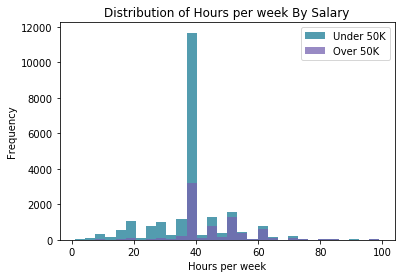

In [6]:
#do a similar histogram for hours per week

hpw_salary_under_50 = df.loc[salary_under_50K, 'hours-per-week']
hpw_salary_over_50 = df.loc[salary_over_50K, 'hours-per-week']

# Call the function to create plot
overlaid_histogram(data1 = hpw_salary_under_50
                   , data1_name = 'Under 50K'
                   , data1_color = '#539caf'
                   , data2 = hpw_salary_over_50
                   , data2_name = 'Over 50K'
                   , data2_color = '#7663b0'
                   , x_label = 'Hours per week'
                   , y_label = 'Frequency'
                   , title = 'Distribution of Hours per week By Salary')
plt.show()

Using aggregate to get a df I could use for my histogram doesn't quite work, the shape of the df does not allow me to create separate bars

In [7]:
count_by_region_by_salary = df.groupby(['salary', 'countryR']).agg({'countryR':'count'})  


#count_by_region_by_salary = df[['countryR', df.loc[salary_under_50K, 'countryR'], df.loc[salary_over_50K, 'countryR'] ]].groupby('countryR').count()
count_by_region_by_salary


countryR
salary countryR               
<=50K  asia                431
       europe              344
       north.america     21716
       other                57
       south.america       105
>50K   asia                203
       europe              149
       north.america      7134
       other                14
       south.america         8

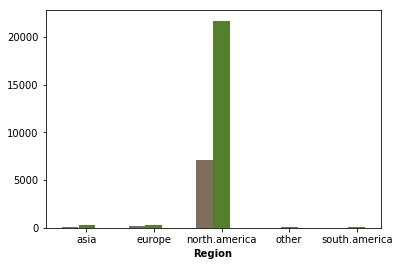

In [8]:
#a better way I found is to use "size" instead of count. Also we need to reset index, so it goeas from 0...
aggreagatedSalaryRegion = df.groupby(['salary', 'countryR']).size().reset_index(name='counts')
aggreagatedSalaryRegion


barWidth = 0.25

# set height of bar
bars1 = aggreagatedSalaryRegion[aggreagatedSalaryRegion['salary'] == ">50K"]
bars1 = bars1.reset_index()
bars1
bars2 = aggreagatedSalaryRegion[aggreagatedSalaryRegion['salary'] == "<=50K"]
bars2 = bars2.reset_index()

 
# # Set position of bar on X axis
r1 = np.arange(len(bars1['counts']))
r2 = [x + barWidth for x in r1]

 
# # Make the plot
plt.bar(r1, bars1['counts'], color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2['counts'], color='#557f2d', width=barWidth, edgecolor='white', label='var2')
# plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# # Add xticks on the middle of the group bars
plt.xlabel('Region', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], aggreagatedSalaryRegion['countryR'])
 
# # Create legend & Show graphic
# plt.legend()
plt.show()
#https://python-graph-gallery.com/11-grouped-barplot/


# Test example
I spent some time figuring out how to do a grouped histogram with this data, here is my example

In [9]:
import pandas as pd
testPlotData = {'region' : pd.Categorical(["asia", "asia", "europe", "africa", "europe", "africa", "europe" ]),
                'salary' : pd.Categorical(["over50", "under50", "over50", "under50", "over50", "under50", "over50"])               
               }

testplotDF = pd.DataFrame.from_dict(testPlotData)
testplotDF
#https://intoli.com/blog/pandas-aggregation/
#get count for under50 for each country


#gdf = testplotDF.groupby(['salary', 'region']).agg({'col3': ['count']})

gdf = testplotDF.groupby(['salary', 'region']).size().reset_index(name='counts')
#tricky, use size for getting counts here
#gdf = testplotDF.groupby(['salary', 'region']).count()
gdf

,salary,region,counts
0,over50,asia,1
1,over50,europe,3
2,under50,africa,2
3,under50,asia,1


# Notes about missing data
Pandas will recognise a value as null if it is a np.nan object, which will print as NaN in the DataFrame. Your missing values are probably empty strings, which Pandas does not recognise as null. To rectify this, you can convert the empty stings (or whatever is in your empty cells) to np.nan objects using replace(), and then call dropna()on your DataFrame to delete rows with null tenants.

In [10]:
import numpy as np
age_salary_under_50.replace('', np.nan, inplace=True)
#age_salary_under_50.head()
age_salary_under_50.isnull().values.any()
age_salary_over_50.head(10)

6     52
7     31
8     42
9     37
10    30
18    43
19    40
24    56
44    57
51    47
Name: age, dtype: int64

https://www.datascience.com/blog/learn-data-science-intro-to-data-visualization-in-matplotlib